<a href="https://colab.research.google.com/github/kkiyota63/StarClusterSimulationsr/blob/main/StarClusterSimulationsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize_matplotlib

In [ ]:
import pandas as pd
import numpy as np
import japanize_matplotlib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6 class csv.csv')

In [ ]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


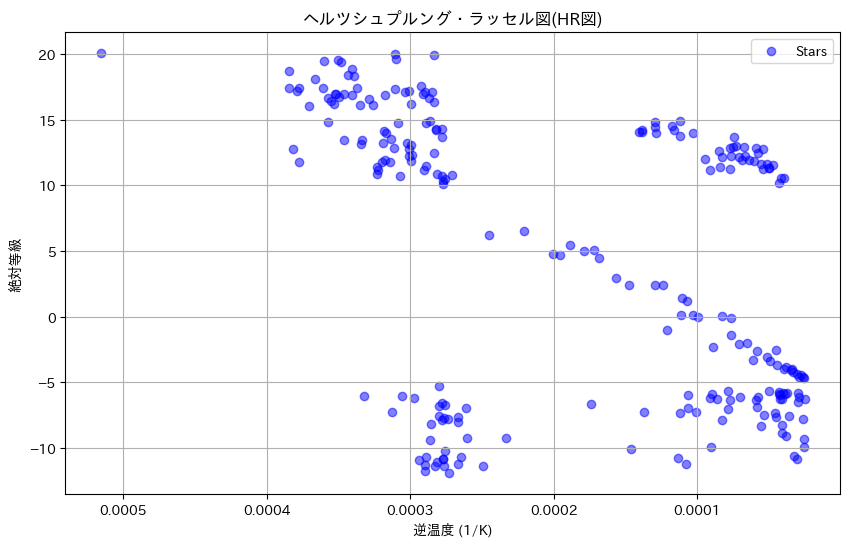

In [ ]:
import matplotlib.pyplot as plt

# プロット用のデータを準備する
# HR図の慣例に合わせて温度はその逆数をプロットする
# 絶対等級はそのまま使用する
x = 1 / df['Temperature (K)']  # 温度の逆数をプロットするために取得
y = df['Absolute magnitude(Mv)']

# プロットを作成する
plt.figure(figsize=(10, 6))

# 星の散布図をプロットする
plt.scatter(x, y, c='blue', label='Stars', alpha=0.5)

# HR図の慣例に合わせて、より高い温度が左側になるようにx軸を反転する
plt.gca().invert_xaxis()

# ラベルとタイトルを追加する
plt.title('ヘルツシュプルング・ラッセル図(HR図)')
plt.xlabel('逆温度 (1/K)')
plt.ylabel('絶対等級')

# 読みやすさを向上させるためにグリッドを追加する
plt.grid(True)

# 凡例を追加する
plt.legend()

# プロットを表示する
plt.show()


**主系列星(Main Sequence):**

HR図の右下から左上にかけての斜めの帯は主系列星を示しています。
この帯に含まれる星は、核融合によってエネルギーを生成している安定した段階にあります。温度が上昇するにつれて光度も上がる傾向があります。


**赤色巨星(Red Giants)と超巨星(Supergiants):**

HR図の右上部に位置します。
これらの星は主系列星よりもかなり大きな半径を持ち、低い温度で非常に高い光度を持っています。


**白色矮星(White Dwarfs):**

HR図の左下部に位置します。
これらの星は小さな半径を持ち、高い温度で低い光度を持っています。


**星の色と温度:**

の色は温度に関連しており、HR図では温度が低い赤い星が右側、温度が高い青い星が左側にあります。


**進化の過程:**

星の寿命において異なる段階があり、HR図上での位置によって、星がどの進化段階にあるかを推測できます。

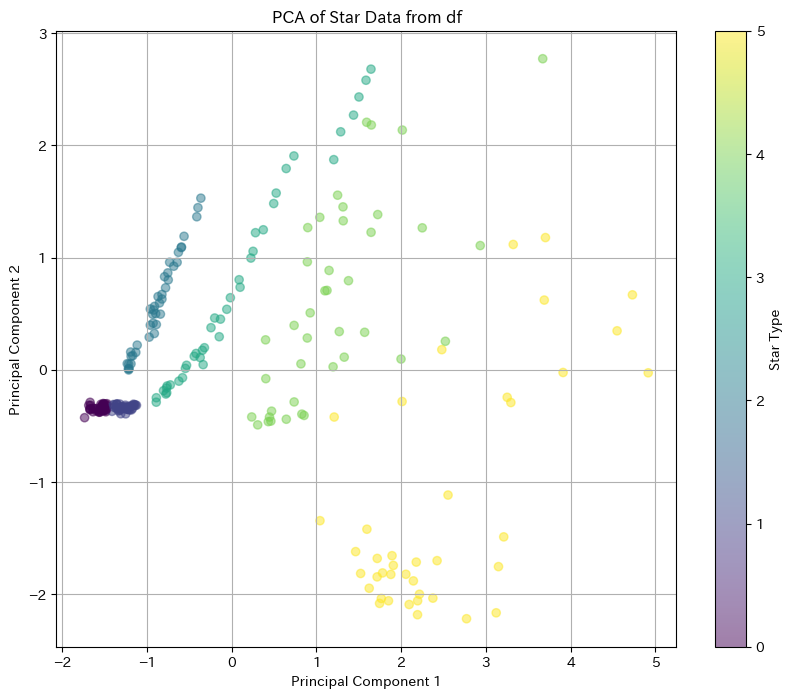

array([0.60357391, 0.23500784])

In [ ]:
# Selecting numerical features for PCA from df
numerical_features_df = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
# Standardizing the features from df
numerical_features_standardized_df = StandardScaler().fit_transform(numerical_features_df)

# Performing PCA on df
pca_df = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
principal_components_df = pca_df.fit_transform(numerical_features_standardized_df)
principal_df_df = pd.DataFrame(data=principal_components_df, columns=['PC1', 'PC2'])

# Concatenate the principal components with the original df
final_df_df = pd.concat([principal_df_df, df[['Star type', 'Star color', 'Spectral Class']]], axis=1)

# Visualize the first two principal components from df
plt.figure(figsize=(10, 8))
scatter_df = plt.scatter(final_df_df['PC1'], final_df_df['PC2'],
                      c=final_df_df['Star type'], alpha=0.5, cmap='viridis')
plt.title('PCA of Star Data from df')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(scatter_df, label='Star Type')

# Show the plot
plt.show()

# Return the variance ratio explained by each component from df
pca_df.explained_variance_ratio_


主成分分析（PCA）を行い、データセットの星の特徴を2次元に縮約しました。このプロットでは、各点は星を表し、色は星のタイプに基づいています。PCAはデータの変動を最もよく捉える軸（主成分）を見つけ出す方法です。この場合、最初の主成分（PC1）はデータ変動の約60.4%を、2番目の主成分（PC2）は約23.5%を説明しており、合わせて約83.9%の変動を捉えています。

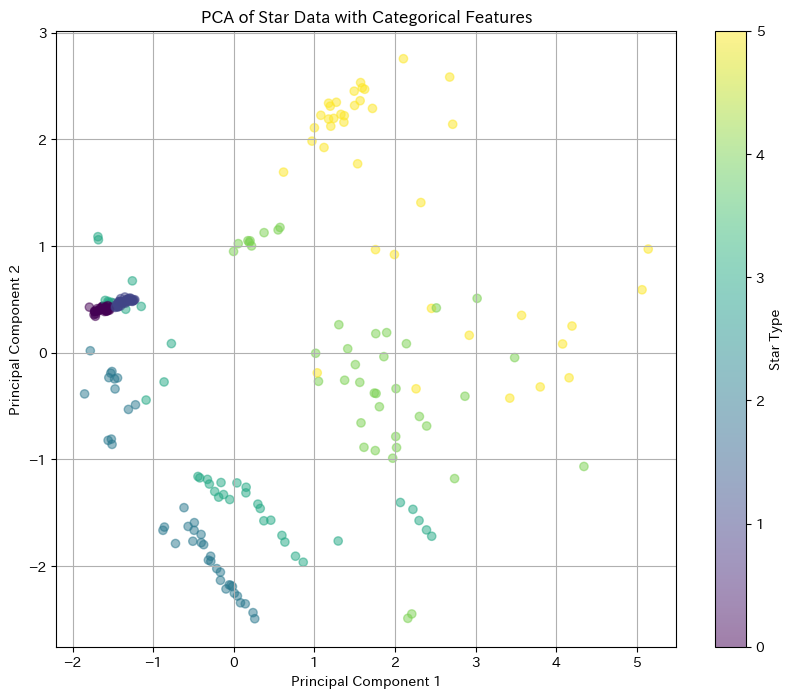

array([0.45187689, 0.24589726])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical features
df['Star color encoded'] = le.fit_transform(df['Star color'])
df['Spectral Class encoded'] = le.fit_transform(df['Spectral Class'])

# Now we include the encoded categorical features for PCA
features_for_pca = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)',
                       'Star color encoded', 'Spectral Class encoded']]
# Standardize the features
features_for_pca_standardized = StandardScaler().fit_transform(features_for_pca)

# Perform PCA
pca_with_categorical = PCA(n_components=2)
principal_components_with_categorical = pca_with_categorical.fit_transform(features_for_pca_standardized)
principal_df_with_categorical = pd.DataFrame(data=principal_components_with_categorical, columns=['PC1', 'PC2'])

# Visualize the first two principal components including categorical features
plt.figure(figsize=(10, 8))
scatter_with_categorical = plt.scatter(principal_df_with_categorical['PC1'], principal_df_with_categorical['PC2'],
                                       c=le.fit_transform(df['Star type']), alpha=0.5, cmap='viridis')
plt.title('PCA of Star Data with Categorical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(scatter_with_categorical, label='Star Type')

# Show the plot
plt.show()

# Return the variance ratio explained by each component including categorical features
pca_with_categorical.explained_variance_ratio_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

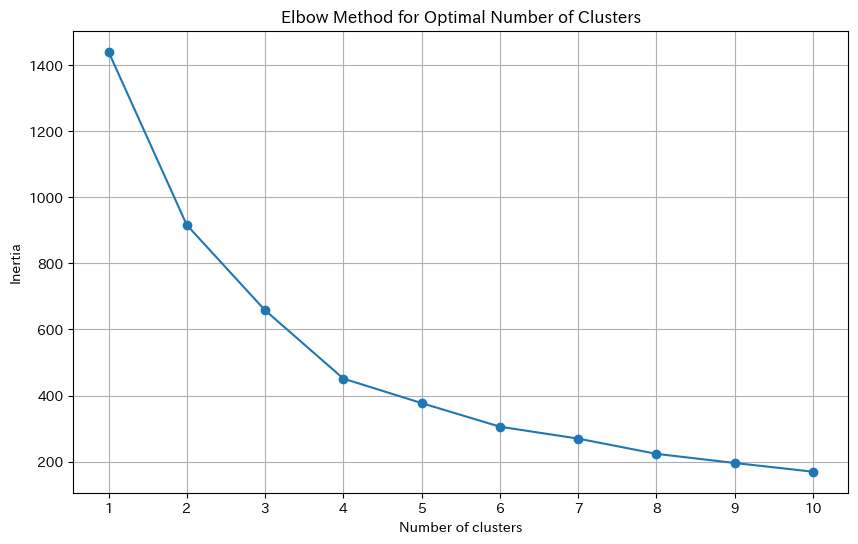

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Perform KMeans clustering
# We will use the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_for_pca_standardized)
    inertia.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


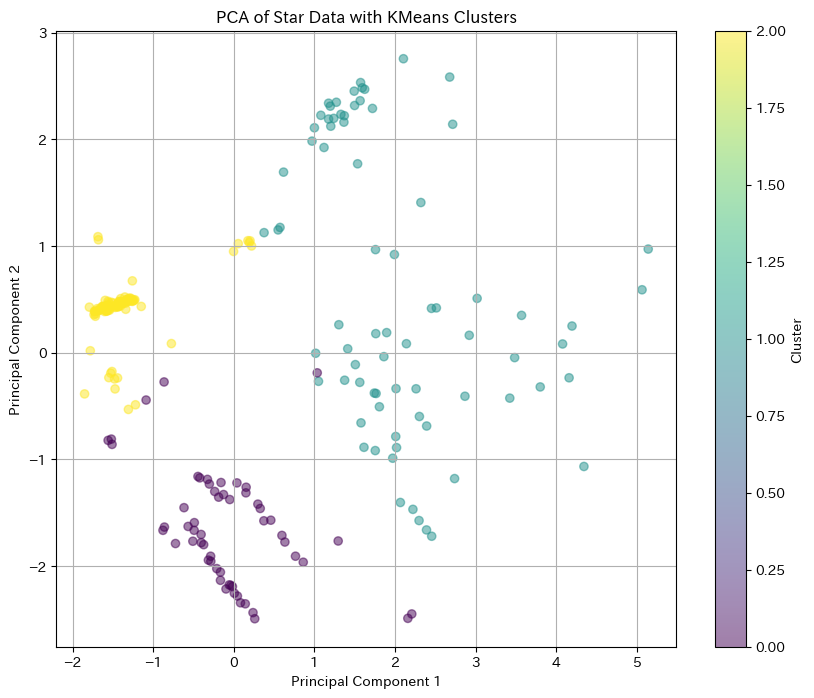

2    108
1     76
0     56
Name: Cluster, dtype: int64

In [ ]:
# Re-performing the standardization and PCA with categorical features included

# Standardize the features again
features_for_pca_standardized = StandardScaler().fit_transform(features_for_pca)

# Perform PCA again
pca_with_categorical = PCA(n_components=2)
principal_components_with_categorical = pca_with_categorical.fit_transform(features_for_pca_standardized)
principal_df_with_categorical = pd.DataFrame(data=principal_components_with_categorical, columns=['PC1', 'PC2'])

# Perform KMeans clustering with the optimal number of clusters found from the elbow method
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_optimal.fit(features_for_pca_standardized)

# Assign the clusters to the df
df['Cluster'] = kmeans_optimal.labels_

# Visualize the clusters along with the first two principal components
plt.figure(figsize=(10, 8))
scatter_clusters = plt.scatter(principal_df_with_categorical['PC1'], principal_df_with_categorical['PC2'],
                               c=df['Cluster'], alpha=0.5, cmap='viridis')
plt.title('PCA of Star Data with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(scatter_clusters, label='Cluster')

# Show the plot
plt.show()

# Return the number of stars in each cluster
df['Cluster'].value_counts()
